# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
cities 

['busselton',
 'roald',
 'boa vista',
 'wanning',
 'albany',
 'hobart',
 'hermanus',
 'bhadrachalam',
 'nikolskoye',
 'altamont',
 'acapulco',
 'kapaa',
 'harper',
 'punta arenas',
 'belushya guba',
 'conceicao do araguaia',
 'bintulu',
 'nizhniy ufaley',
 'avarua',
 'rawson',
 'rikitea',
 'chuy',
 'saint-philippe',
 'havelock',
 'vaini',
 'pangai',
 'bluff',
 'yulara',
 'umzimvubu',
 'kalispell',
 'codajas',
 'tasiilaq',
 'west plains',
 'broome',
 'tuatapere',
 'naze',
 'manokwari',
 'benton harbor',
 'belmonte',
 'dimapur',
 'airai',
 'narayangarh',
 'san cristobal',
 'jubayl',
 'hilo',
 'severo-kurilsk',
 'pisco',
 'tateyama',
 'obluche',
 'kamenka',
 'tuktoyaktuk',
 'mataura',
 'kapit',
 'barentsburg',
 'amderma',
 'kruisfontein',
 'rawlins',
 'atar',
 'wendo',
 'georgetown',
 'aitape',
 'sao filipe',
 'pitimbu',
 'cherskiy',
 'miguel auza',
 'atuona',
 'jamestown',
 'tiksi',
 'qaanaaq',
 'tabiauea',
 'new norfolk',
 'barrow',
 'tsihombe',
 'akcakoca',
 'geraldton',
 'illoqqortoor

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [167]:
units = "imperial"

citiesFound = []
lats = []
longs = []
temps = []
humids = []
pressures = []
winds = []
clouds = []
countries = []
date = []

counter = 0
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    try:
        response = requests.get(url).json()
        code = response["cod"]
        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp_max"])
            humids.append(response["main"]["humidity"])
            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])
            countries.append(response["sys"]["country"])
            date.append(response["dt"])
        if counter % 50 == 0:
            print(counter)
    except Exception as e:
        print(e)
    counter += 1
    time.sleep(1) 

0
50
100
150
200
250
300
350
400
450
500
550
600


In [168]:
counter

605

In [169]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.12, 'lon': -100.77},
 'dt': 1588560696,
 'id': 5697939,
 'main': {'feels_like': 57.38,
          'humidity': 48,
          'pressure': 1013,
          'temp': 64.49,
          'temp_max': 66.2,
          'temp_min': 64},
 'name': 'North Platte',
 'sys': {'country': 'US',
         'id': 4674,
         'sunrise': 1588505852,
         'sunset': 1588556528,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 10.29}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [170]:
df = pd.DataFrame()
df['Cities'] = citiesFound
df['Lat'] = lats
df['Lng'] = longs
df['Max Temp'] = temps
df['Humidity'] = humids
df['Wind Speed'] = winds
df['Cloudiness'] = clouds
df['Country'] = countries
df['Date'] = date
df

,Cities,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,busselton,-33.65,115.33,64.99,95,1.99,100,AU,1588560254
1,roald,62.58,6.13,39.99,74,3.36,72,NO,1588560255
2,boa vista,2.82,-60.67,77.00,88,5.82,20,BR,1588560256
3,wanning,18.80,110.40,86.07,68,13.71,1,CN,1588560257
4,albany,42.60,-73.97,69.80,37,13.87,75,US,1588560051
...,...,...,...,...,...,...,...,...,...
557,corn island,12.17,-83.04,81.19,80,14.32,89,NI,1588560979
558,ouadda,8.08,22.40,70.70,51,2.73,27,CF,1588560980
559,horsham,51.06,-0.33,51.01,93,4.70,75,GB,1588560981
560,hearst,49.68,-83.67,25.09,93,9.17,100,CA,1588560916


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [171]:
for index, row in df.iterrows():
    if row["Humidity"] > 100:
        df.drop(df.index[[index]], inplace=False)
        
df

,Cities,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,busselton,-33.65,115.33,64.99,95,1.99,100,AU,1588560254
1,roald,62.58,6.13,39.99,74,3.36,72,NO,1588560255
2,boa vista,2.82,-60.67,77.00,88,5.82,20,BR,1588560256
3,wanning,18.80,110.40,86.07,68,13.71,1,CN,1588560257
4,albany,42.60,-73.97,69.80,37,13.87,75,US,1588560051
...,...,...,...,...,...,...,...,...,...
557,corn island,12.17,-83.04,81.19,80,14.32,89,NI,1588560979
558,ouadda,8.08,22.40,70.70,51,2.73,27,CF,1588560980
559,horsham,51.06,-0.33,51.01,93,4.70,75,GB,1588560981
560,hearst,49.68,-83.67,25.09,93,9.17,100,CA,1588560916


In [9]:
#  Get the indices of cities that have humidity over 100%.

In [172]:
quartiles = df.Humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 55.25
The upper quartile of temperatures is: 87.0
The interquartile range of temperatures is: 31.75
The the median of temperatures is: 74.0 
Values below 7.625 could be outliers.
Values above 134.625 could be outliers.


In [203]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call 
# "clean_city_data".

y = df['Humidity']
clean_city_data = y.between(y.quantile(0.05), y.quantile(0.95))

print(str(y[clean_city_data].size) + "/" + str(len(df.Cities)) + " data points remain.") 
print(clean_city_data.value_counts())

505/562 data points remain.
True     505
False     57
Name: Humidity, dtype: int64


In [175]:
# INVERT removed_outliers!!
index_names = df[~clean_city_data].index 

# The resulting 20 dates to drop.
print(index_names)

Int64Index([  8,  51,  57,  68,  71, 104, 108, 112, 131, 132, 135, 142, 152,
            166, 171, 173, 180, 181, 200, 246, 251, 254, 257, 270, 272, 299,
            306, 309, 313, 318, 323, 328, 336, 345, 352, 362, 368, 376, 383,
            384, 387, 394, 396, 410, 424, 435, 436, 440, 453, 457, 462, 463,
            471, 473, 496, 509, 514],
           dtype='int64')


In [176]:
clean_df = df.drop(index_names, inplace=False).reset_index(drop=True)
clean_df

,Cities,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,busselton,-33.65,115.33,64.99,95,1.99,100,AU,1588560254
1,roald,62.58,6.13,39.99,74,3.36,72,NO,1588560255
2,boa vista,2.82,-60.67,77.00,88,5.82,20,BR,1588560256
3,wanning,18.80,110.40,86.07,68,13.71,1,CN,1588560257
4,albany,42.60,-73.97,69.80,37,13.87,75,US,1588560051
...,...,...,...,...,...,...,...,...,...
500,corn island,12.17,-83.04,81.19,80,14.32,89,NI,1588560979
501,ouadda,8.08,22.40,70.70,51,2.73,27,CF,1588560980
502,horsham,51.06,-0.33,51.01,93,4.70,75,GB,1588560981
503,hearst,49.68,-83.67,25.09,93,9.17,100,CA,1588560916


In [177]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_df.to_csv("City_Data")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [178]:
clean_df

,Cities,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,busselton,-33.65,115.33,64.99,95,1.99,100,AU,1588560254
1,roald,62.58,6.13,39.99,74,3.36,72,NO,1588560255
2,boa vista,2.82,-60.67,77.00,88,5.82,20,BR,1588560256
3,wanning,18.80,110.40,86.07,68,13.71,1,CN,1588560257
4,albany,42.60,-73.97,69.80,37,13.87,75,US,1588560051
...,...,...,...,...,...,...,...,...,...
500,corn island,12.17,-83.04,81.19,80,14.32,89,NI,1588560979
501,ouadda,8.08,22.40,70.70,51,2.73,27,CF,1588560980
502,horsham,51.06,-0.33,51.01,93,4.70,75,GB,1588560981
503,hearst,49.68,-83.67,25.09,93,9.17,100,CA,1588560916


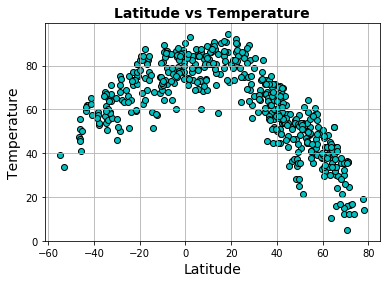

In [275]:
plt.scatter(clean_df.Lat, clean_df["Max Temp"],color = "c", edgecolor = "black")
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Temperature", fontsize = 14)
plt.ylim(0, max(clean_df["Max Temp"])+5)
plt.title("Latitude vs Temperature", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

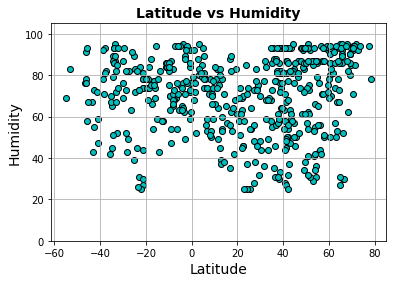

In [276]:
plt.scatter(clean_df.Lat, clean_df.Humidity,color = "c",edgecolor = "black")
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity", fontsize = 14)
plt.ylim(0, max(clean_df.Humidity)+10)
plt.title("Latitude vs Humidity", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

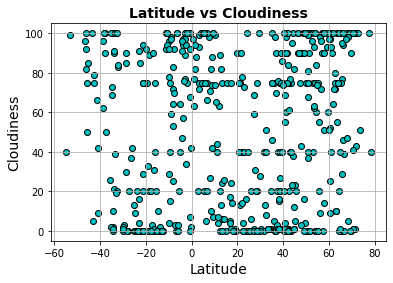

In [277]:
plt.scatter(clean_df.Lat, clean_df.Cloudiness,color = "c", edgecolors="black")
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness", fontsize = 14)
plt.title("Latitude vs Cloudiness", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

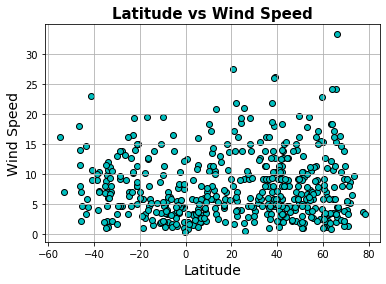

In [278]:
plt.scatter(clean_df.Lat, clean_df["Wind Speed"],color = "c", edgecolor = "black")
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed", fontsize = 14)
plt.title("Latitude vs Wind Speed", fontsize = 15, fontweight="bold")
plt.grid()
plt.show()

## Linear Regression

In [279]:
# OPTIONAL: Create a function to create Linear Regression plots

In [291]:
# Create Northern and Southern Hemisphere DataFrames
North_mask = clean_df.Lat >= 0
North_df = clean_df.loc[North_mask].reset_index(drop=True)

South_mask = clean_df.Lat < 0
South_df = clean_df.loc[South_mask].reset_index(drop=True)
North_df
South_df

,Cities,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,busselton,-33.65,115.33,64.99,95,1.99,100,AU,1588560254
1,hobart,-42.88,147.33,62.01,55,5.82,75,AU,1588560041
2,hermanus,-34.42,19.23,55.69,79,9.78,0,ZA,1588560261
3,punta arenas,-53.15,-70.92,33.80,83,6.93,99,CL,1588560269
4,conceicao do araguaia,-8.26,-49.26,78.80,83,3.36,72,BR,1588560271
...,...,...,...,...,...,...,...,...,...
151,jeremoabo,-10.07,-38.48,72.00,86,5.32,92,BR,1588560957
152,namibe,-15.20,12.15,75.83,59,5.21,0,AO,1588560958
153,kalulushi,-12.84,28.09,58.05,58,3.60,0,ZM,1588560961
154,vicuna,-30.03,-70.71,46.00,69,1.59,1,CL,1588560963


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7685021040510909


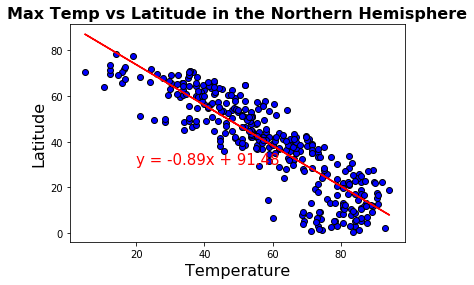

In [310]:
x_values = North_df["Max Temp"]
y_values = North_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title('Max Temp vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Temperature', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5926947899562156


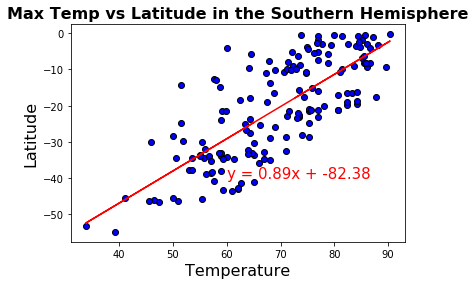

In [309]:
x_values = South_df["Max Temp"]
y_values = South_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-40),fontsize=15,color="red")
plt.title('Max Temp vs Latitude in the Southern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Temperature', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.041236444174922546


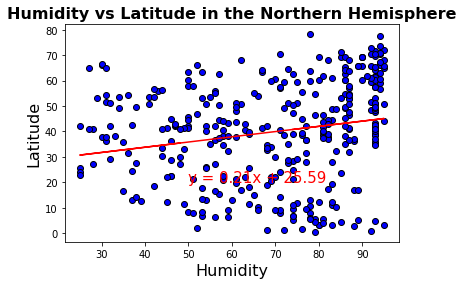

In [311]:
x_values = North_df["Humidity"]
y_values = North_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('Humidity vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Humidity', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002041454670657498


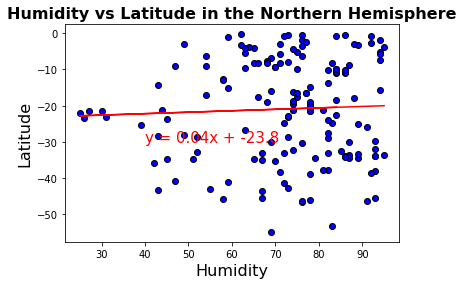

In [316]:
x_values = South_df["Humidity"]
y_values = South_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-30),fontsize=15,color="red")
plt.title('Humidity vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Humidity', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023863756322609647


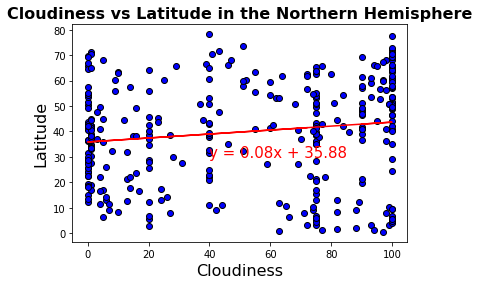

In [315]:
x_values = North_df["Cloudiness"]
y_values = North_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Cloudiness', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.6363925951712823e-06


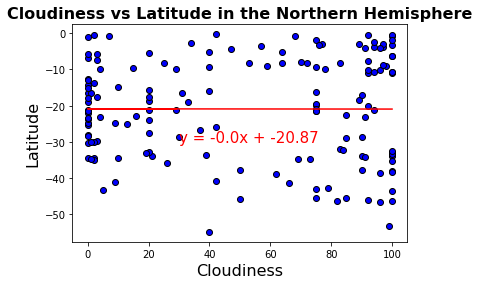

In [314]:
x_values = South_df["Cloudiness"]
y_values = South_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-30),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Cloudiness', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011021074097777358


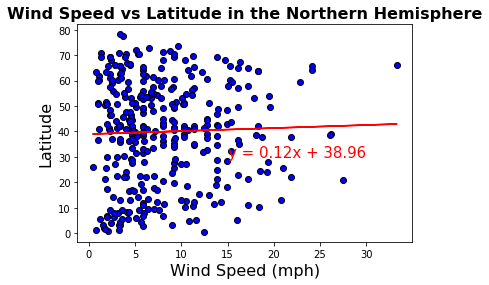

In [313]:
x_values = North_df["Wind Speed"]
y_values = North_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Wind Speed (mph)', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07843880828049571


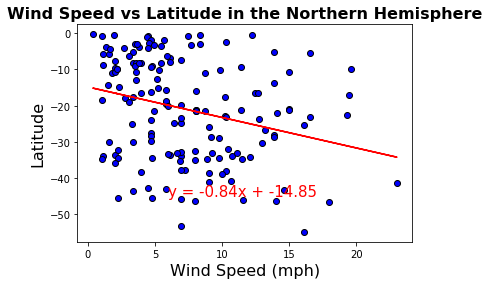

In [312]:
x_values = South_df["Wind Speed"]
y_values = South_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-45),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude in the Northern Hemisphere', fontsize = 16, fontweight="bold")
plt.xlabel('Wind Speed (mph)', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()